RGB Color processing (Intro to ML Task)

Import Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"


Load Dataset

In [ ]:
    from google.colab import files
    uploaded = files.upload()

Saving final_data.csv to final_data (1).csv


In [ ]:
file_path = '/kaggle/input/color-classification/ColorClassification'

categories = ['orange','Violet','red','Blue','Green','Black','Brown','White']

img_size = 1280

Exploration of the Data ana Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data from the uploaded CSV file
df = pd.read_csv('final_data.csv')

# Separate features (RGB values) and labels (color names)
X = df[['red', 'green', 'blue']]
y = df['label']

# Encode the color names into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the first few rows of the processed data
print("Features (first 5 rows):")
display(X.head())
print("\nLabels (first 5 rows after encoding):")
display(y_encoded[:5])
print("\nEncoded class names:")
display(label_encoder.classes_)

Features (first 5 rows):


,red,green,blue
0,20,139,240
1,174,83,72
2,144,249,131
3,168,25,156
4,30,182,136



Labels (first 5 rows after encoding):


array([1, 2, 3, 6, 3])


Encoded class names:


array(['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Orange', 'Pink',
       'Purple', 'Red', 'White', 'Yellow'], dtype=object)

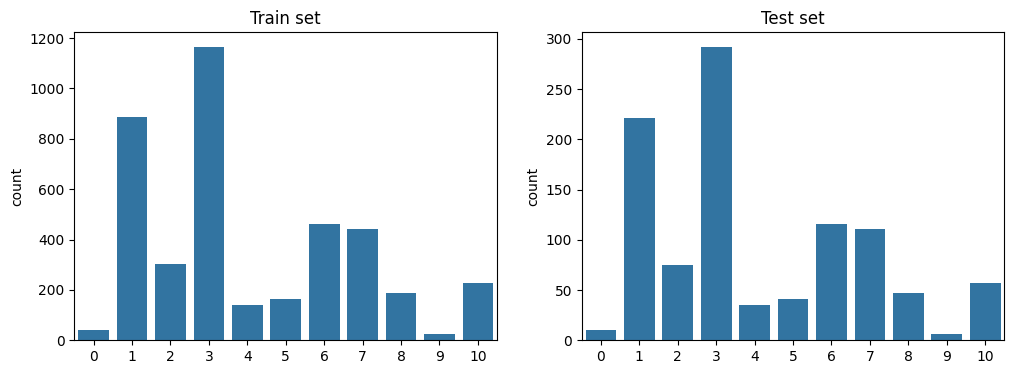

In [ ]:
# Draw histogram of the target in train and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   target  5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB
None
               red        green         blue
count  5052.000000  5052.000000  5052.000000
mean    127.416073   126.316310   128.296912
std      73.958449    74.927131    74.174008
min       0.000000     0.000000     0.000000
25%      63.000000    60.000000    63.000000
50%     128.000000   127.000000   130.000000
75%     191.000000   192.000000   192.000000
max     255.000000   255.000000   255.000000


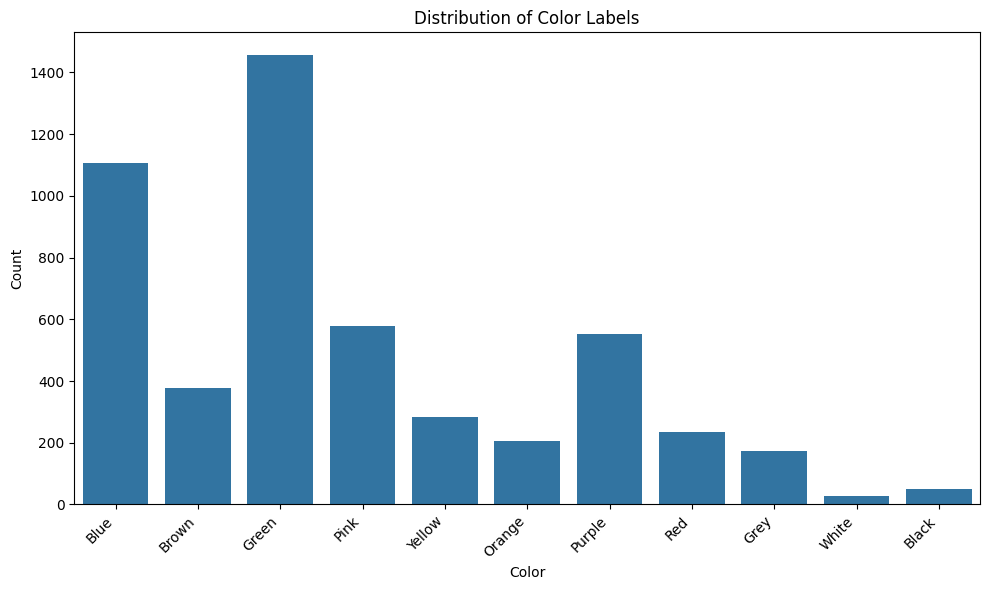

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier exploration using your color data
# Assuming X contains the features (RGB values) and y contains the original labels (color names)
df_color = pd.DataFrame(data=X, columns=['red', 'green', 'blue'])
df_color['target'] = y

# Display basic information about the dataset
print(df_color.info())

# Display summary statistics of the features
print(df_color.describe())

# Draw histogram of the target variable (color distribution)
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df_color)
plt.title('Distribution of Color Labels')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4041, 3)
Shape of X_test: (1011, 3)
Shape of y_train: (4041,)
Shape of y_test: (1011,)


KNN classifier

In [ ]:
# Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_tested_again = knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy on the training set (if you need it)
train_accuracy = accuracy_score(y_train, y_tested_again)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

print("KNN Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_tested_again))

Train Accuracy: 91.71%
KNN Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.88      0.89      0.89       221
           2       0.78      0.87      0.82        75
           3       0.91      0.93      0.92       292
           4       0.67      0.57      0.62        35
           5       0.79      0.76      0.78        41
           6       0.83      0.82      0.82       116
           7       0.73      0.74      0.73       111
           8       0.75      0.77      0.76        47
           9       1.00      0.83      0.91         6
          10       0.87      0.70      0.78        57

    accuracy                           0.84      1011
   macro avg       0.82      0.79      0.80      1011
weighted avg       0.84      0.84      0.84      1011

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.95      0.95 

Tuning KNN classifier

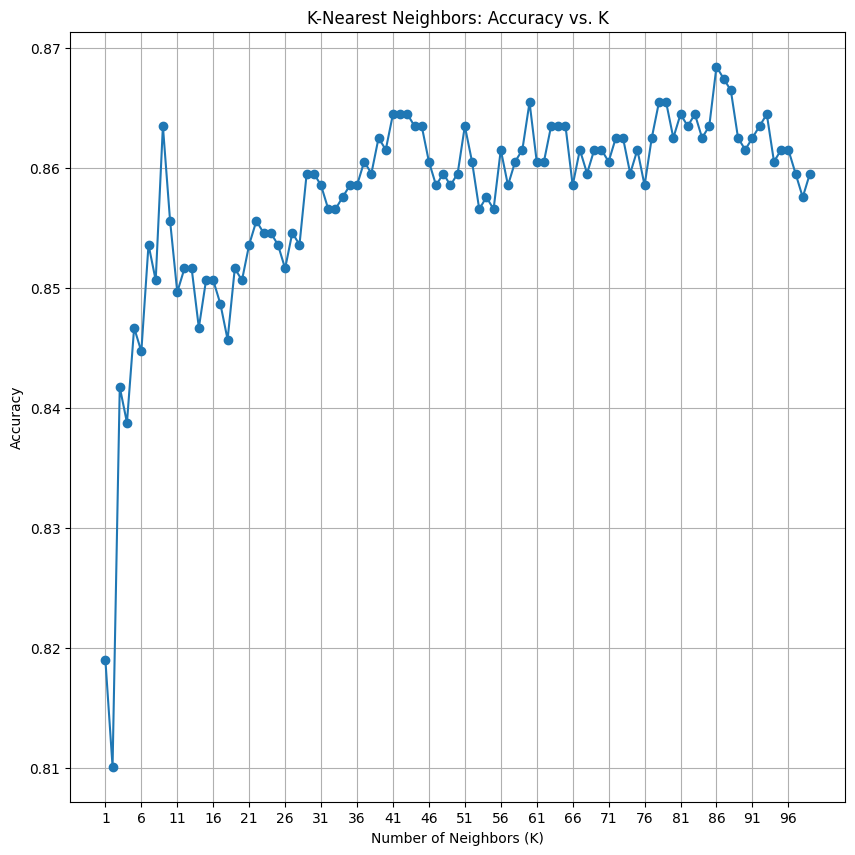

In [ ]:
# Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Hyperparameter tuning for KNN
k_values = range(1, 100)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting accuracies for different K values
plt.figure(figsize=(10, 10))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Nearest Neighbors: Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 100, 5))
plt.grid(True)
plt.show()

In [ ]:
import pickle

# Save the trained KNN model
with open('knn_RGB_color_classifier_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

print("KNN model saved successfully as knn_model.pkl")

KNN model saved successfully as knn_model.pkl
